In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_titanic = pd.read_csv('Import/titanic.csv')

In [ ]:
# Apresentar um DataFrame com nome, idade e sexo de todas as sobreviventes mulheres que estavam na primeira classe.
objetivo1 = df_titanic.loc[
(df_titanic['Sex']=='female') & 
(df_titanic['Pclass']==1) & 
(df_titanic['Survived']==1),
['Name', 'Age', 'Sex', 'Pclass', 'Survived']]
objetivo1 = objetivo1.sort_values(['Name'],ascending = True)
objetivo1

In [27]:
#Exportar
objetivo1.to_csv('Export/Resultado_Objetivo_1.csv', index = False)

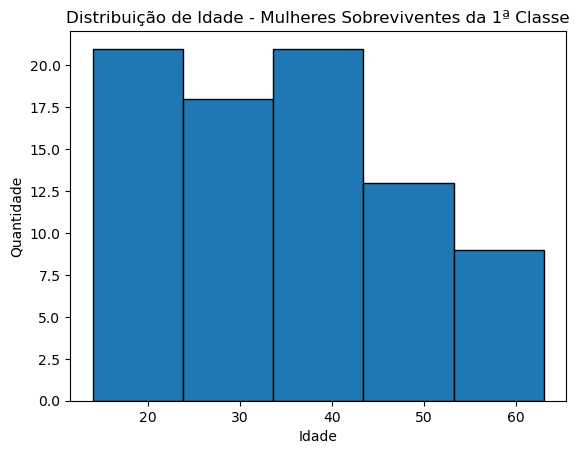

In [26]:
plt.hist(objetivo1['Age'].dropna(), bins=5, edgecolor='black')
plt.title('Distribuição de Idade - Mulheres Sobreviventes da 1ª Classe')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.grid(False)
plt.savefig('Export/Idade_Mulheres_Sobreviventes.png')
plt.show()

In [32]:
# Comparativo entre os sobreviventes de todas as classes

#Cria Lista de Sobreviventes
sobreviventes = df_titanic[df_titanic['Survived']==1]

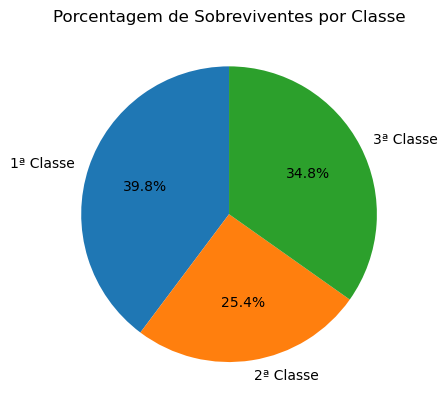

In [70]:
#'Porcentagem de Sobreviventes por Classe
sobreviventes = df_titanic[df_titanic['Survived']==1]
pizza = sobreviventes['Pclass'].value_counts().sort_index()
pizza.plot(
    kind='pie', #Tipo do grafico
    autopct='%1.1f%%', #formata como porcentagem e com 1 casa decimal
    labels=['1ª Classe', '2ª Classe', '3ª Classe'], #Legenda
    startangle=90 #Começa o grafico pelo maior valor
)
plt.title('Porcentagem de Sobreviventes por Classe')
plt.ylabel('')
plt.savefig('Export/Porcentagem-sobreviventes-classe.png')
plt.show()


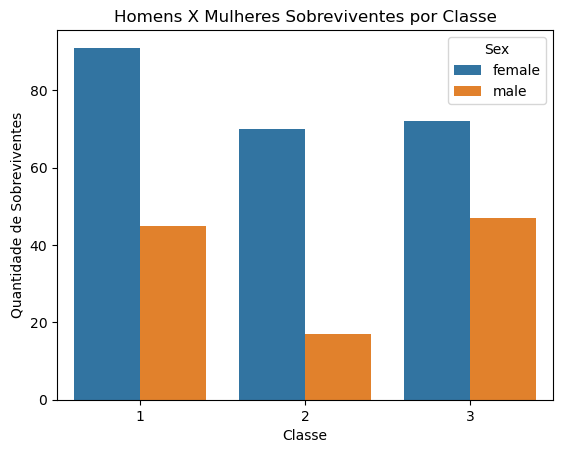

In [75]:
sns.countplot(data=df_titanic[df_titanic['Survived']==1], x='Pclass', hue='Sex')
plt.title('Homens X Mulheres Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade de Sobreviventes')
plt.savefig('Export/home-mulheres-sobreviventes.png')
plt.show()

C:\Users\ingri\AppData\Local\Temp\ipykernel_16256\3396415621.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sobrevivencia_por_classe, x='Pclass', y='Survived', palette='pastel')


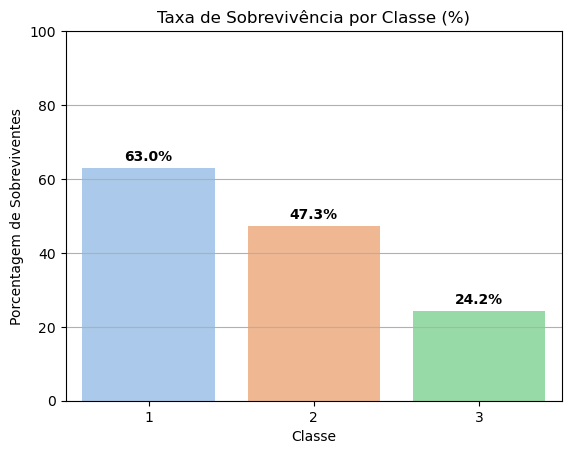

In [71]:
# Calcula a taxa de sobrevivência por classe 

sobrevivencia_por_classe = df_titanic.groupby('Pclass')['Survived'].mean().reset_index() #Agrupa a tabela por classe e calcula a media
#reset_index() - Transforma o resultado em uma tabela de 2 colunas: Pclass e Survived

#converte o valor para %
sobrevivencia_por_classe['Survived'] = sobrevivencia_por_classe['Survived'] * 100  

#Criaando Grafico
ax = sns.barplot(data=sobrevivencia_por_classe, x='Pclass', y='Survived', palette='pastel')

# Configurando grafico
plt.title('Taxa de Sobrevivência por Classe (%)')
plt.xlabel('Classe')
plt.ylabel('Porcentagem de Sobreviventes')
plt.ylim(0, 100)
plt.grid(axis='y')

# Adiciona os valores percentuais no topo de cada barra
for i, v in enumerate(sobrevivencia_por_classe['Survived']):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.savefig('Export/taxa-de-sobreviventes-classe.png')

plt.show()
